In [1]:
#Import packages
import numpy as np
import os
import re
from math import sin, cos, pi
import glob
import subprocess
from subprocess import call, check_output
import pandas as pd
import sys
from time import time
import matplotlib.pyplot as plt
from plumbum.cmd import grep, awk

import shutil
import random
import sklearn
from shutil import copy
import csv
import h5py as h5
import seaborn as sns; sns.set(style="ticks", color_codes=True)


In [2]:
"""Simple program in Qiskit."""
# Import the Qiskit package
# Importing everything
from qiskit import *
from qiskit.visualization import plot_histogram
#Create a quantum register with one qubit
qreg = qiskit.QuantumRegister(1, name='qreg')
# Create a classical register with one qubit
creg = qiskit.ClassicalRegister(1, name='creg')
# Create a quantum circuit with the above registers
circ = qiskit.QuantumCircuit(qreg, creg)
# Add a NOT operation on the qubit
circ.x(qreg[0])
# Add a measurement on the qubit
circ.measure(qreg, creg)
# Print the circuit
print(circ.draw())
# Get a backend to run on
backend = qiskit.BasicAer.get_backend("qasm_simulator")
# Execute the circuit on the backend and get the measurement results
job = qiskit.execute(circ, backend, shots=10)
result = job.result()
# Print the measurement results
print(result.get_counts())

        ┌───┐┌─┐
qreg_0: ┤ X ├┤M├
        └───┘└╥┘
creg: 1/══════╩═
              0 
{'1': 10}


In [3]:
# Superdense coding example
# Define a function that takes a QuantumCircuit (qc) 
# and two integers (a & b)
def create_bell_pair(qc, a, b):
    qc.h(a) # Apply a h-gate to the first qubit
    qc.cx(a,b) # Apply a CNOT, using the first qubit as the control

In [4]:
# Define a function that takes a QuantumCircuit (qc)
# a qubit index (qubit) and a message string (msg)
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass    # To send 00 we do nothing
    elif msg == "10":
        qc.x(qubit) # To send 10 we apply an X-gate
    elif msg == "01":
        qc.z(qubit) # To send 01 we apply a Z-gate
    elif msg == "11":
        qc.z(qubit) # To send 11, we apply a Z-gate
        qc.x(qubit) # followed by an X-gate
    else:
        print("Invalid Message: Sending '00'")

In [5]:
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

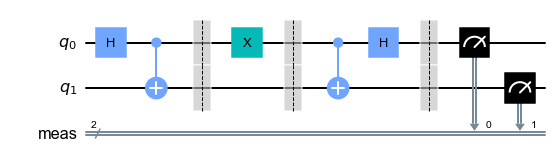

In [6]:
# Create the quantum circuit with 2 qubits
qc = QuantumCircuit(2)


# First, Charlie creates the entangled pair between Alice and Bob
create_bell_pair(qc, 0, 1)
qc.barrier() # This adds a barrier to our circuit. A barrier 
             # separates the gates in our diagram and makes it 
             # clear which part of the circuit is which

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 0. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = "10"
encode_message(qc, 0, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After recieving qubit 0, Bob applies the recovery protocol:
decode_message(qc, 0, 1)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw(output = "mpl")

{'10': 1024}


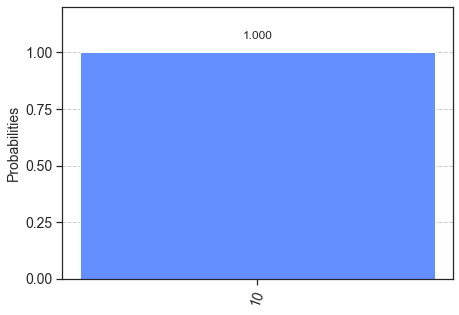

In [7]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

In [9]:
# from qiskit import IBMQ
# from qiskit.providers.ibmq import least_busy
# shots = 256

# # Load local account information
# IBMQ.load_account()
# # Get the least busy backend
# provider = IBMQ.get_provider(hub='ibm-q')
# backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
#                                        and not x.configuration().simulator 
#                                        and x.status().operational==True))
# print("least busy backend: ", backend)
# # Run our circuit
# job = execute(qc, backend=backend, shots=shots)
# # Monitoring our job
# from qiskit.tools.monitor import job_monitor
# job_monitor(job)
# # Plotting our result
# result = job.result()
# plot_histogram(result.get_counts(qc))
# correct_results = result.get_counts(qc)[message]
# accuracy = (correct_results/shots)*100
# print("Accuracy = %.2f%%" % accuracy)

In [42]:
from qiskit.chemistry.drivers import PySCFDriver, UnitsType, Molecule
molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                              ['H', [0., 0., 0.735]]],
                     charge=0, multiplicity=1)
driver = PySCFDriver(molecule = molecule, unit=UnitsType.ANGSTROM, basis='sto3g')

In [43]:
from qiskit.chemistry.transformations import (FermionicTransformation, 
                                              FermionicTransformationType, 
                                              FermionicQubitMappingType)

fermionic_transformation = FermionicTransformation(
            transformation=FermionicTransformationType.FULL,
            qubit_mapping=FermionicQubitMappingType.JORDAN_WIGNER,
            two_qubit_reduction=False,
            freeze_core=False)

In [44]:
qubit_op, _ = fermionic_transformation.transform(driver)
print(qubit_op)
print(fermionic_transformation.molecule_info)

NameError: name 'param' is not defined

In [31]:
qubit_op, _ = fermionic_transformation.transform(driver)
print(qubit_op)
print(fermionic_transformation.molecule_info)

NameError: name 'param' is not defined

In [22]:
fermionic_transformation_2 = FermionicTransformation(
            transformation=FermionicTransformationType.FULL,
            qubit_mapping=FermionicQubitMappingType.PARITY,
            two_qubit_reduction=True,
            freeze_core=False)
qubit_op_2, _ = fermionic_transformation_2.transform(driver)
print(qubit_op_2)

NameError: name 'param' is not defined